## INDENG 222 Project
By: Adrian Enders, Rena Wang

In [3]:
#importing necessary libararies and setting values M and N
import numpy.random as npr
import numpy as np
npr.seed(222)
N = 100
M = 10000

#### 1 Brownian Motion and Black Scholes Model

In [ ]:
# 1.1 Brownaian Motion

def gen_rw(t):
  W1 = np.zeros(M)
  #We create M generations of our random walk
  for i in range(M):
      # 1.1.1 This gives us a program of a random walk
      X = npr.choice([-1,1],N*t)
      W = sum(X)/np.sqrt(N)
      W1[i] = W

  print(f"E[W{t}]: {np.round(np.mean(W1),3)} Var[W{t}]: {np.round(np.var(W1),3)}")

#1.1.2 generating M paths for t = 1, 5, 10
gen_rw(1)
gen_rw(5)
gen_rw(10)

E[W1]: 0.002 Var[W1]: 1.017
E[W5]: -0.016 Var[W5]: 4.984
E[W10]: 0.04 Var[W10]: 10.106


We can see in the above that the expected value of W for any t is roughly zero with variance of roughly t

In [ ]:
#1.1.3
t = np.arange(0.1,1.1,0.1)
quad_vars = np.zeros(10)
for ti in t:
    X = npr.choice([-1,1],int(N*ti))
    quad_vars[int(ti*10-1)] = np.sum(np.abs(X) ** 2/ (N))
quad_vars

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In the above, we take the property that $[W,W]_t$ = $\sum$$|X_j|^2$ / N. Here N = 200 and we some $X_j$ to N * t. For every t we can see that $[W,W]_t$ = t

In [ ]:
#1.2.1
t = 1
path = npr.choice([-1,1],N*t)

I_top_est = 0
for i in range(len(path)-1):
  wi = sum(path[0:i])/np.sqrt(N)
  wiplus  = sum(path[0:i+1])/np.sqrt(N)
  I_top_est += wiplus * (wiplus-wi)
I_top_numerical = (sum(path) /np.sqrt(N))  ** 2 / 2 + 0.5
print((I_top_est, I_top_numerical))

#1.2.2
t = 1
path = npr.choice([-1,1],N*t)

I_bott_est = 0
for i in range(len(path)-1):
  wi = sum(path[0:i])/np.sqrt(N)
  wiplus  = sum(path[0:i+1])/np.sqrt(N)
  I_bott_est += wi * (wiplus-wi)
I_bott_numerical = (sum(path) /np.sqrt(N))  ** 2 / 2 - 0.5
print((I_bott_est, I_bott_numerical))

(2.299999999999998, 2.5)
(0.35000000000000003, 0.21999999999999997)


For Ito's formula we use <u>I</u> or $I$ underlined as the Ito integral of $W_1$

In [ ]:
#1.2.4
estimates = np.zeros(M)
estimates_squared = np.zeros(M)
for j in range(M):
  t = 1
  path = npr.choice([-1,1],N*t)

  I_bott_est = 0
  for i in range(len(path)-1):
    wi = sum(path[0:i])/np.sqrt(N)
    wiplus  = sum(path[0:i+1])/np.sqrt(N)
    I_bott_est += wi * (wiplus-wi)
  estimates[j] = I_bott_est
  estimates_squared[j] = I_bott_est **2
print(np.mean(estimates))
print(np.mean(estimates_squared))


0.00925200000000003
0.4806213600000001


The mean $I$ is close to zero and the mean $I^2$ is close to 0.5. Which is what we expect for the theoretical values of the mean and variance of $W_1$ which are 0 and 0.5 respectively.

In [ ]:
#1.3.1.1
S0 = 100
r = 0.01
sig = 0.2

def explicitSDE(t):
  return S0 * np.e ** (sig * sum(Wpath) / np.sqrt(N) + (r-sig**2/2)*t)


def EMscheme(t):
  St = np.zeros(int(N*t))
  for i in range(int(N*t)):
    if i == 0:
      St[i] = S0
    else:
      St[i] = St[i-1] * (1 + r*(t/N) + sig * (Wpath[i-1]/np.sqrt(N)))
  return St[-1]

t = np.arange(0.1,1,0.1)
for ti in t:
  Wpath = npr.choice([-1,1],int(N*ti))
  print(f't = {np.round(ti,2)}, EM estimate = {np.round(EMscheme(ti),2)} ,SDE estimate = {np.round(explicitSDE(ti),2)}')


t = 0.1, EM estimate = 101.85 ,SDE estimate = 99.9
t = 0.2, EM estimate = 93.85 ,SDE estimate = 95.89
t = 0.3, EM estimate = 119.14 ,SDE estimate = 121.77
t = 0.4, EM estimate = 101.39 ,SDE estimate = 99.6
t = 0.5, EM estimate = 97.3 ,SDE estimate = 99.5
t = 0.6, EM estimate = 105.31 ,SDE estimate = 103.46
t = 0.7, EM estimate = 114.0 ,SDE estimate = 111.96
t = 0.8, EM estimate = 55.46 ,SDE estimate = 56.67
t = 0.9, EM estimate = 101.03 ,SDE estimate = 99.1


We can see for different values of t the numerical scheme and SDE scheme that their values are very close and usually with 3 dollars or so.

In [ ]:
#1.3.1.2
t = 1
estimates = []
for i in range(M):
  estimates.append(explicitSDE(t))
np.mean(estimates)

99.00498337491679

<ipython-input-66-304274520f6f>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(28,52,2.5).astype('int'))


[Text(-5.0, 0, '28'),
 Text(0.0, 0, '30'),
 Text(5.0, 0, '33'),
 Text(10.0, 0, '35'),
 Text(15.0, 0, '38'),
 Text(20.0, 0, '40'),
 Text(25.0, 0, '43'),
 Text(30.0, 0, '45'),
 Text(35.0, 0, '48'),
 Text(40.0, 0, '50'),
 Text(45.0, 0, '')]

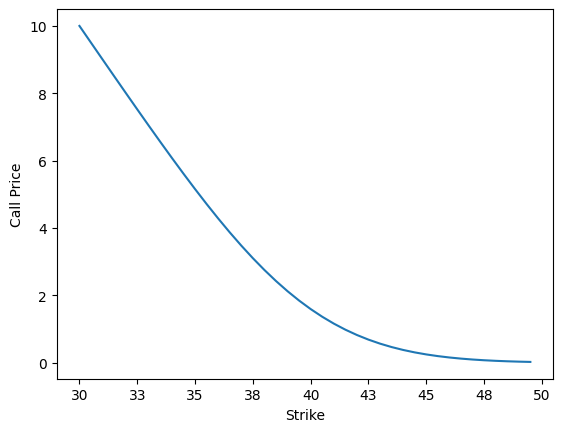

In [ ]:
#1.3.2.1-2
import scipy.stats as s
import matplotlib.pyplot as plt

def CallBS(r,sigma, S0, T, K):
    d_plus = (np.log(S0/K) + (r + sigma ** 2 / 2) * T) / (sigma * np.sqrt(T))
    d_minus = (np.log(S0/K) + (r - sigma ** 2 / 2) * T) / (sigma * np.sqrt(T))

    left = S0 * s.norm.cdf(d_plus)
    right = K * np.e ** (-r*T) * s.norm.cdf(d_minus)
    return left - right

def PutBS(r,sigma, S0, T, K):
    d_plus = (np.log(S0/K) + (r + sigma ** 2 / 2) * T) / (sigma * np.sqrt(T))
    d_minus = (np.log(S0/K) + (r - sigma ** 2 / 2) * T) / (sigma * np.sqrt(T))

    right = S0 * s.norm.cdf(-d_plus)
    left = K * np.e ** (-r*T) * s.norm.cdf(-d_minus)
    return left - right

strikes = np.arange(30,50,0.5)
prices = []
for strike in strikes:
  prices.append(CallBS(r = 0, S0 = 40, T = 1, sigma = 0.1, K = strike))
fig, ax  = plt.subplots()
ax.plot(prices)
ax.set_xlabel('Strike')
ax.set_ylabel("Call Price")
ax.set_xticklabels(np.arange(28,52,2.5).astype('int'))


As we can see in the graph above the call option is convex.

In [ ]:
#1.3.2.3
strikes = np.arange(35,56,5)
sigmas = [0.2,0.3,0.4]
Ts = [1,2]
rs = [0.03,0.04,0.05]

estimate_puts = []
puts_parity = []
for strike in strikes:
  for sigma in sigmas:
    for T in Ts:
      for r in rs:
        estimate_put = PutBS(r = r, S0 = 40, T = T, sigma = sigma, K = strike)
        estimate_puts.append(estimate_put)

        estimate_call = CallBS(r = r, S0 = 40, T = T, sigma = sigma, K = strike)
        put_parity = estimate_call + strike * np.e ** (-r * T) - 40
        puts_parity.append(put_parity)
#The code below checks if the values of the BS estimate and put-call parity estimate are roughly close.
print(f'Put-Call Parity Holds: {np.all(np.round(estimate_puts,3) == np.round(puts_parity,3))}')

Put-Call Parity Holds: True


Given the output of the code above we can see that for all different inputs the put-call parity holds.

In [ ]:
#1.4.1
S0 = 40
r = 0.03
T = 1
K_ATM = np.e **(r*T) * S0

sigmas = np.arange(0.1,0.6,0.1)

for sigma in sigmas:
  BS_estimate = CallBS(r = r, sigma = sigma, S0 = S0, T = T, K = K_ATM)
  other_estimate = 0.4 * S0 * sigma * np.sqrt(T)
  print( [np.round(sigma,1), np.round(BS_estimate,2), np.round(other_estimate,2)])


[0.1, 1.6, 1.6]
[0.2, 3.19, 3.2]
[0.3, 4.77, 4.8]
[0.4, 6.34, 6.4]
[0.5, 7.9, 8.0]


From the code above it is evident that the BS estimate is close to the numerical estimate for different values of volatility.

In [ ]:
#1.4.2
S0 = 40
T = 1
sigmas = np.arange(0.1,0.6,0.1)

for sigma in sigmas:
  deltaBS = s.norm.cdf(sigma/2 * np.sqrt(T))
  other_delta = 0.5 + 0.2*sigma*np.sqrt(T)
  print( [np.round(sigma,1), np.round(deltaBS,3), np.round(other_delta,3)])

[0.1, 0.52, 0.52]
[0.2, 0.54, 0.54]
[0.3, 0.56, 0.56]
[0.4, 0.579, 0.58]
[0.5, 0.599, 0.6]


From the code above it is evident that the BS estimate of Delta is close to the numerical estimate for different values of volatility.

In [ ]:
S0 = 40
T = 1
sigmas = np.arange(0.1,0.6,0.1)

for sigma in sigmas:
  vegaBS = S0 * s.norm.pdf(sigma/2 * np.sqrt(T)) * np.sqrt(T)
  other_vega = 0.4 * S0 * np.sqrt(T)
  print( [np.round(sigma,1), np.round(vegaBS,3), np.round(other_vega,3)])

[0.1, 15.938, 16.0]
[0.2, 15.878, 16.0]
[0.3, 15.779, 16.0]
[0.4, 15.642, 16.0]
[0.5, 15.467, 16.0]


From the code above it is evident that the BS estimate of Vega is close to the numerical estimate for different values of volatility.

#### 2 Black-Scholes vs Bachelier

In [ ]:
def CallBach(r,sigmaB, S0, T, K):
  first = (S0 - K) * s.norm.cdf((S0-K)/(sigmaB*np.sqrt(T)))
  second = sigmaB * T * np.sqrt(T) * s.norm.pdf((S0-K)/(sigmaB*np.sqrt(T)))
  return first + second

In [ ]:
r = 0
sigmaB = 0.1
S0 = 40
sigma = sigmaB/S0
K = 40
T = 1

bach_ATM = CallBach(r,sigmaB = sigmaB, S0 = S0, T= T, K = K)
bs_ATM = CallBS(r,sigma,S0,T,K)

value = bach_ATM - bs_ATM
limit = S0/(24*np.sqrt(2*np.pi)) * (abs(sigmaB) ** 3) * (T ** (3/2))

#Checks if the differnce in the Call Bachelier and Black Scholes is greater than zero
#and less than the upper limit
print(value >= 0)
print(value <= limit)

True
True


The code above shows that numerically the Bachelier and Blacks Scholes call option at the moeny is greater than zero and less than the specified limit.

#### 3 Pricing Asian Option in the Black-Scholes Model

In [4]:
def CallAsian(r, sigma, S0, T, K, arithmetic = True):
    Wpath = npr.choice([-1,1],int(N*T))
    Sts = []
    if arithmetic != True:
      for i in range(len(Wpath)):
        if i == 0:
          St = S0
        else:
          St = S0 * np.e ** (sigma * sum(Wpath[0:i]) / np.sqrt(i) + (r-sigma**2/2)*(i/N/T))
        Sts.append(St)
      return np.e ** (-r*T) * (max([np.prod(Sts) ** (1 / len(Sts)) - K,0]))

    for i in range(len(Wpath)):
      if i == 0:
        St = S0
      else:
        St = S0 * np.e ** (sigma * sum(Wpath[0:i]) / np.sqrt(i) + (r-sigma**2/2)*(i/N/T))
      Sts.append(St)
    return np.e ** (-r*T) * (max([np.sum(Sts) / len(Sts) - K,0]))

CallAsian(0.03,0.1,40,1,35,arithmetic=False)

6.434239957930786

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Text(0.5, 1.0, 'Difference in Arithmetic and Geometric Asian Calls')

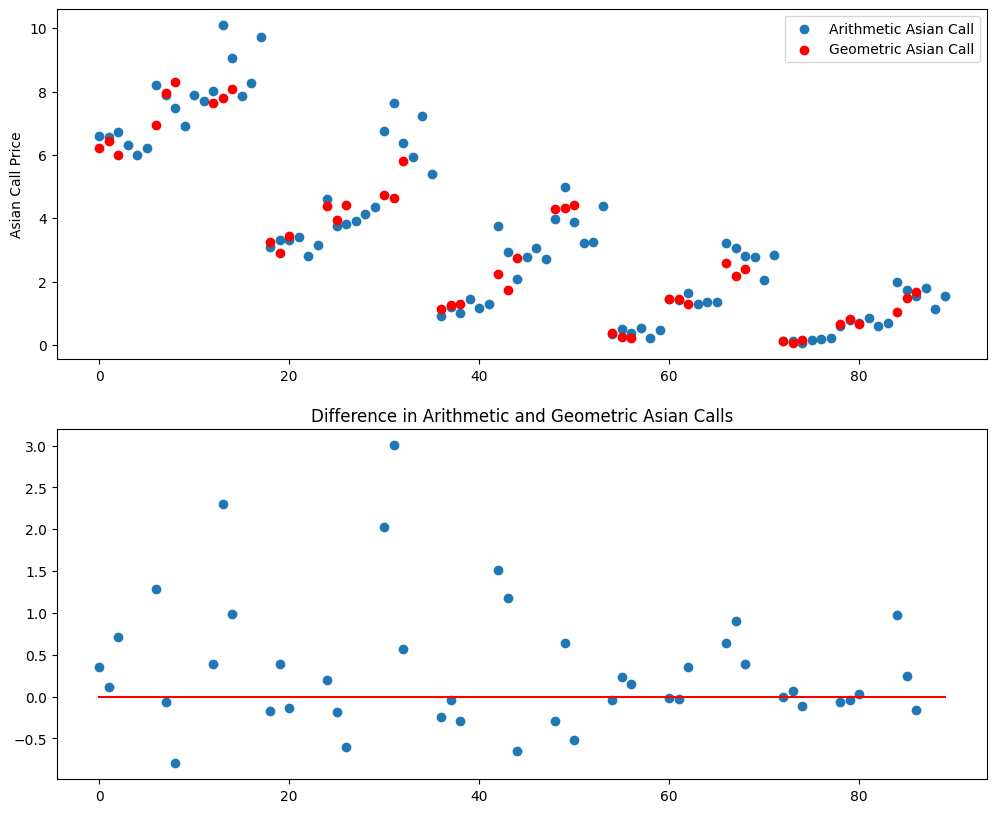

In [12]:
from matplotlib import pyplot as plt
strikes = np.arange(35,56,5)
sigmas = [0.2,0.3,0.4]
Ts = [1,2]
rs = [0.03,0.04,0.05]

arts_mean = []
geos_mean = []
diffs_mean = []

for strike in strikes:
  for sigma in sigmas:
    for T in Ts:
      for r in rs:
        arts = []
        geos = []
        diffs = []
        #In this case M is 200 as 10,000 is too computationally heavy for calculating so many different calls
        for i in range(200):
          art = CallAsian(r=r,sigma = sigma, S0 =40, T=T, K= strike)
          geo = CallAsian(r=r,sigma = sigma, S0 =40, T=T, K= strike, arithmetic = False)
          arts.append(art)
          geos.append(geo)
          diff = art - geo
          diffs.append(diff)
        arts_mean.append(np.mean(arts))
        geos_mean.append(np.mean(geos))
        diffs_mean.append(np.mean(diffs))

fig, ax = plt.subplots(2,1, figsize = (12,10))
ax[0].scatter(range(len(arts_mean)), arts_mean, label = "Arithmetic Asian Call")
ax[0].scatter(range(len(geos_mean)),geos_mean, label = "Geometric Asian Call", color = 'red')
ax[0].set_ylabel("Asian Call Price")
ax[0].legend()
ax[1].scatter(range(len(diffs_mean)),diffs_mean)
ax[1].plot(np.zeros(len(diffs_mean)), color = 'red')
ax[1].set_title("Difference in Arithmetic and Geometric Asian Calls")

As we can see from the graphs above, the arithmetic and geometric Asian Call options are quite close in price estimation despite only using 200 simulations. There are some values where they vary a lot of up to 3 dollars, but this most likely do to low amounts of simulations.

In [13]:
arts = []
geos = []
for j in range(M):
  art = CallAsian(r=0.01,sigma = 0.1, S0 =40, T=1, K= 35)
  geo = CallAsian(r=0.01,sigma = 0.1, S0 =40, T=1, K= 35, arithmetic = False)
  arts.append(art)
  geos.append(geo)

print(f'arithmetic Asian Call Mean {np.mean(arts)}')
print(f'geometric Asian Call Mean {np.mean(geos)}')
print(f'arithmetic CI: {[np.percentile(arts,2.5) , np.percentile(arts,97.5)]}')
print(f'geometric CI: {[np.percentile(geos,2.5) , np.percentile(geos,97.5)]}')




arithmetic Asian Call Mean 5.313328227669191
geometric Asian Call Mean 5.194920337779708
arithmetic CI: [0.0, 11.969230238881496]
geometric CI: [0.0, 11.759440294969119]


As we can see above the confidence interval for the geometric vs arithmetic Asian Call options is slightly smaller by about 0.2 dollars.

In [ ]:
CallBS(r=0.01,sigma = 0.1, S0 =40, T=1, K= 35)

5.474383172641183

The European Call option for CallBS is slightly more expensive than the Asian call option prices seen above. However, they are quite close and only differ by about 0.3 dollars.

#### 4 Pricing Zero-Coupon Bond in the Vasicek Model

In [14]:
r0 = 0.05
vol = 0.3
a = 1
b = 0.06
T = 1

def vasicek(r0,vol,a,b,T):
  Wpath = npr.choice([-1,1],int(N*T))
  rts = []
  for i in range(len(Wpath)):
    if i == 0:
      rt = r0
    else:
      rt = rts[i-1] + a*(b-rts[i-1])/N + vol * (Wpath[i-1]/np.sqrt(N))
    rts.append(rt)
  return rts

rtss = []
terminal_rts = []
for i in range(M):
  rts = vasicek(r0,vol,a,b,T)
  rtss.append(vasicek(r0,vol,a,b,T))
  terminal_rts.append(rts[-1])

print(np.mean(terminal_rts))
print(np.std(terminal_rts))

0.054150378040908095
0.19550672412890951


In [15]:
r0 = 0.05
vol = 0.3
a = 2
b = 0.04
T = 1

rtss = []
terminal_rts = []
for i in range(M):
  rts = vasicek(r0,vol,a,b,T)
  rtss.append(vasicek(r0,vol,a,b,T))
  terminal_rts.append(rts[-1])

print(np.mean(terminal_rts))
print(np.std(terminal_rts))

0.03952731214074494
0.14904877100417102


In the vasicek model, b represents the terminal value of the interest rate and a represent how quickly the rate reverts to the mean rate. This can be seen as the terminal mean of $r_t$  equal b roughly. As a increases, the volatility of $r_t$ decreases as well, meaning $r_t$ reverts to the mean more often.

In [16]:
r0 = 0.05
vol = 0.3
a = 1
b = 0.06
T = 1

def zcb(r0,vol,a,b,T):
  zcbs = []
  for i in range(M):
    rts =  vasicek(r0,vol,a,b,T)
    price = np.e ** (-sum(rts)/N)
    zcbs.append(price)
  return np.mean(zcbs)
zcb(r0,vol,a,b,T)

0.9550957692158694

In [17]:
ts = [0.5,1,2,5]
r0 = 0.05
vol = 0.3
a = 1
b = 0.06

#prints price of zero coupon bond for different t.
for t in ts:
  print(zcb(r0,vol,a,b,t))

0.9752147246485012
0.9560016776306122
0.9311785807147488
0.8735806690362031


In [18]:
def explicitzcb(r0,vol,a,b,T):
  E = 1 - np.e ** (-a*T)

  first = -b*T
  second = (b-r0) * (E)/a
  third = vol ** 2 / (4*(a**3)) * (E ** 2)
  fourth = vol ** 2  /(2 * (a ** 2)) * (T - E/a)

  return np.e ** (first +second - third + fourth)

ts = [0.5,1,2,5]
r0 = 0.05
vol = 0.3
a = 1
b = 0.06

for t in ts:
  estimate = zcb(r0,vol,a,b,t)
  explicit = explicitzcb(r0,vol,a,b,t)
  print(f'Estimated vs Explicit Zero Coupon Bond: {[np.round(estimate,2), np.round(explicit,2)]}')

Estimated vs Explicit Zero Coupon Bond: [0.98, 0.98]
Estimated vs Explicit Zero Coupon Bond: [0.95, 0.95]
Estimated vs Explicit Zero Coupon Bond: [0.92, 0.93]
Estimated vs Explicit Zero Coupon Bond: [0.88, 0.88]


We can see above that the explicit and estimated zero coupon bond values are really close and differ by only 0.01.